# Classification of Images in the CIFAR-10 Dataset using CNNs

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load CIFAR-10 dataset
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
#Data shape 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualize Data

[1]


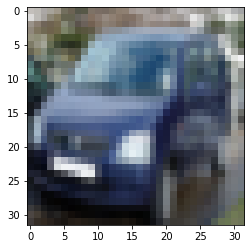

In [4]:
i = 45001 #random image
plt.imshow(X_train[i]) #print image
print(y_train[i]) #print image's label

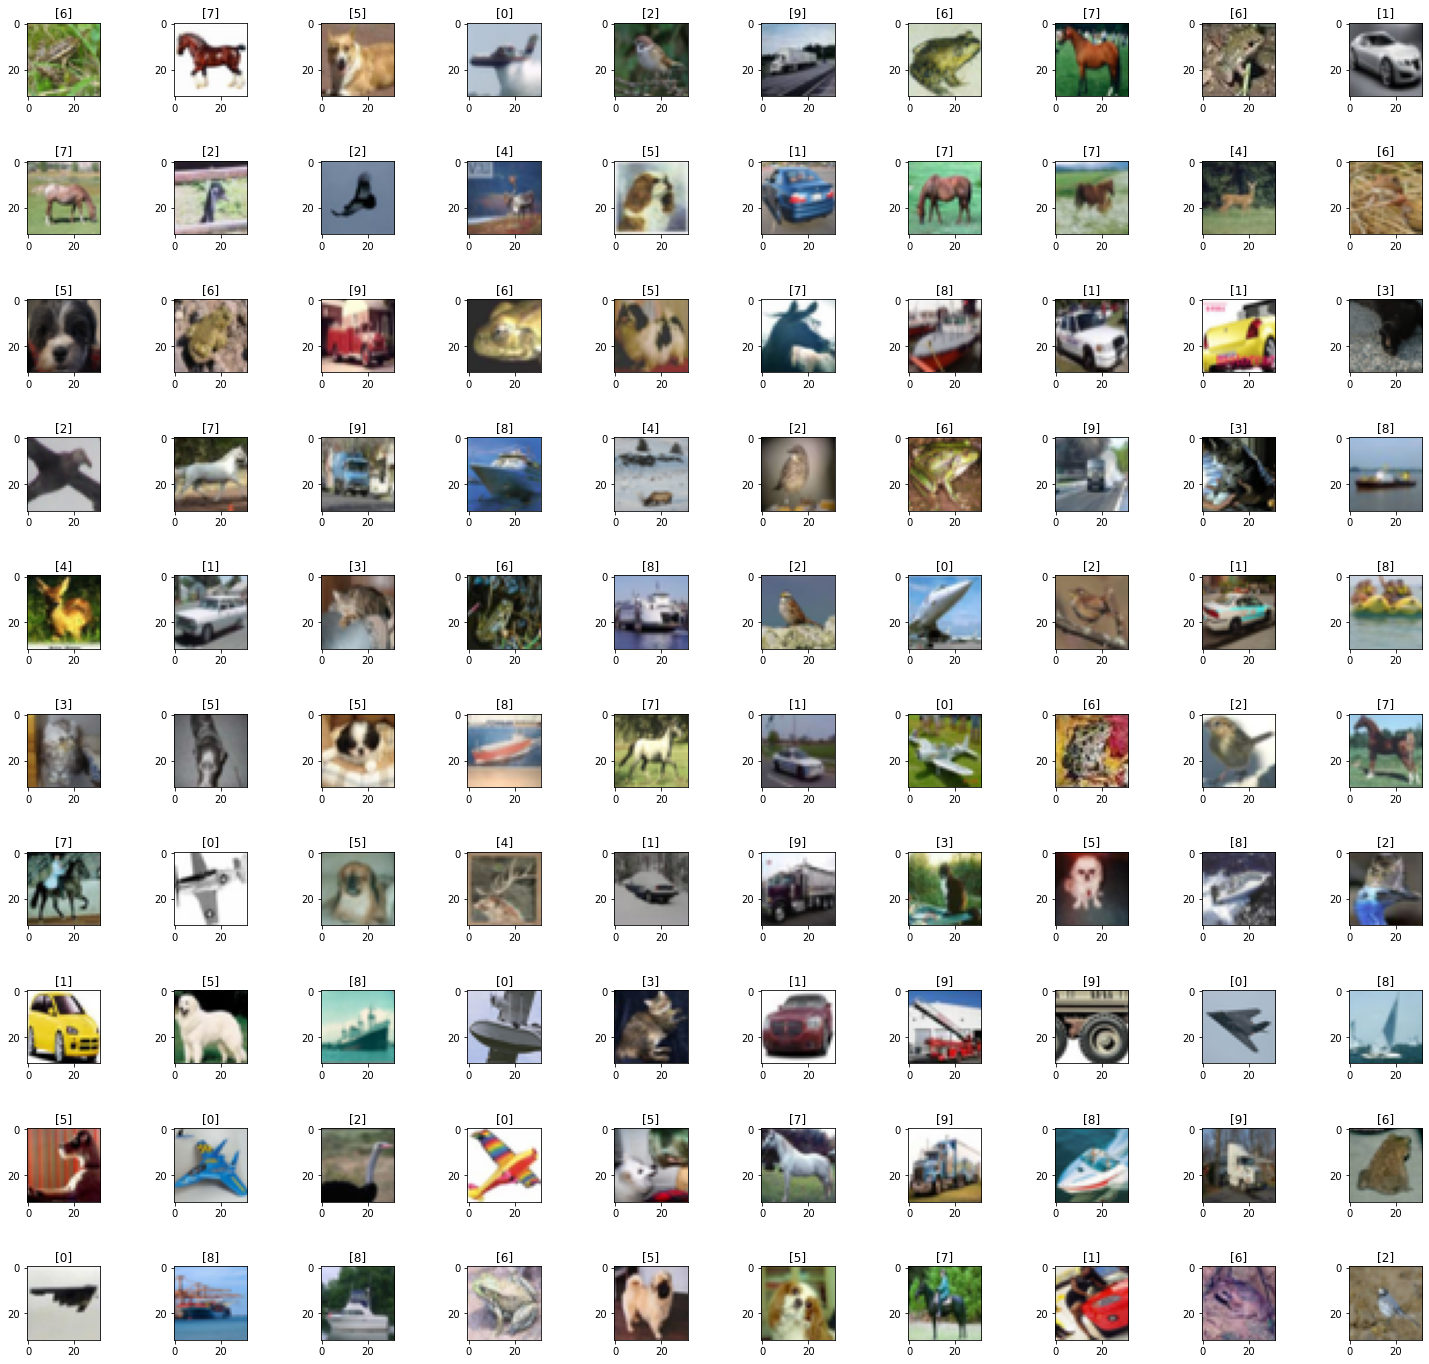

In [5]:
#visualize the data as a grid 
length = 10
width= 10
fig, axes = plt.subplots(length, width, figsize=(25,25)) #create a grid to display the images 
axes = axes.ravel()

n_training = len(X_train) #50000 

for i in np.arange(0, length*width):
    index = np.random.randint(0, n_training) #pick a random image to dispaly
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])

plt.subplots_adjust(wspace = 1)

## Data Cleaning and Preparation

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
num_category = 10 #10 categories in the dataset

In [8]:
import keras 
y_train = keras.utils.to_categorical(y_train, num_category)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, num_category)


In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
#normalize the data 
X_train = X_train/255
X_test = X_test/255

In [13]:
inp_shape = X_train.shape[1:]
inp_shape

(32, 32, 3)

## Training the Model  

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
#build the model and add layers 
def create_cnn_model():
    cnn_model = Sequential()
    #first convolution 
    cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = inp_shape)) #convolutional layer 1
    cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) #convolutional layer 2
    cnn_model.add(MaxPooling2D(pool_size = (2,2))) #perform maxpooling/ downsizing 
    cnn_model.add(Dropout(0.4)) #add dropout for regularization 
    #second convolution 
    cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')) #convolutional layer 1
    cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2,2))) #perform maxpooling/ downsizing 
    cnn_model.add(Dropout(0.4))
    #flattening 
    cnn_model.add(Flatten())
    #create a fully connected network 
    cnn_model.add(Dense(1024, activation = 'relu'))
    cnn_model.add(Dense(1024, activation = 'relu'))
    #output layer 
    #output layer will need 10 units as there a 10 categories in the dataset 
    cnn_model.add(Dense(10, activation = 'softmax'))
    return cnn_model

In [16]:
cnn_model = create_cnn_model()

In [17]:
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [18]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 495s 317ms/step - loss: 1.6511 - accuracy: 0.4005
Epoch 2/2
1563/1563 [==============================] - 443s 283ms/step - loss: 1.2319 - accuracy: 0.5733


## Model Evaluation

In [19]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 62ms/step - loss: 1.0754 - accuracy: 0.6459


In [20]:
prediction = cnn_model.predict_classes(X_test)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
y_test = y_test.argmax(1)
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

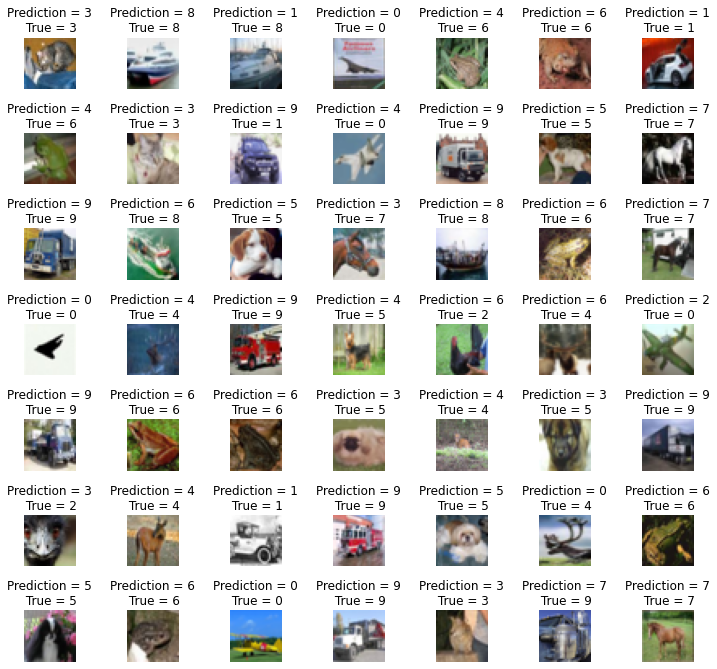

In [23]:
grid_length = 7
grid_width = 7
fig, axes = plt.subplots(grid_length, grid_width, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0,grid_length*grid_width):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(prediction[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

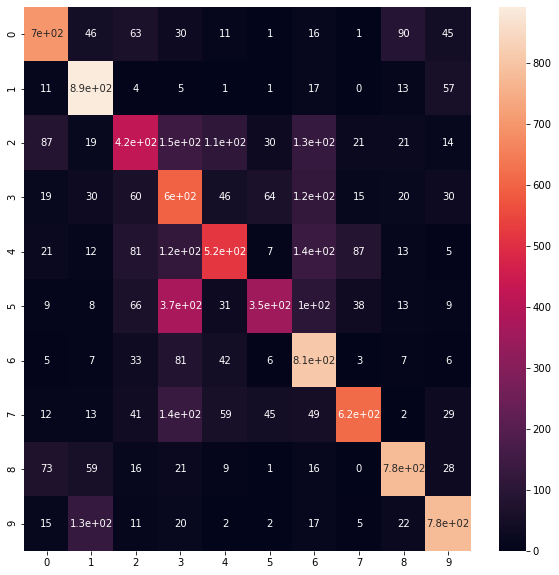

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

## Save the Model

In [25]:
import os 

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_keras_trained_model.h5')
cnn_model.save(model_path)

## Image Augmentation to Improve the Model 

In [ ]:
import keras 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

In [ ]:
n = 8
X_train_sample = X_train[:n]
print(X_train_sample.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_rotate = ImageDataGenerator(rotation_range = 90)
data_vert_flip = ImageDataGenerator(vertical_flip=True)
data_height_shift = ImageDataGenerator(height_shift_range=0.5)
data_bright = ImageDataGenerator(brightness_range=(1,3))

data_rotate.fit(X_train_sample)

In [ ]:
from keras.preprocessing.image import array_to_img

fig = plt.figure(figsize= (20,2))
for batch in data_rotate.flow(X_train_sample, batch_size= n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(array_to_img(batch[i]))
    fig.suptitle('Augmented Images')
    plt.show()
    break

## Training the Model Using the Augmented Data

In [33]:
from keras.preprocessing.image import ImageDataGenerator

aug_data = ImageDataGenerator(rotation_range=90,
                              width_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True)

In [34]:
aug_data.fit(X_train)

In [35]:
cnn_model.fit(aug_data.flow(X_train, y_train, batch_size=32), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 285s 182ms/step - loss: nan - accuracy: 1.0000
Epoch 2/2
1190/1563 [=====================>........] - ETA: 2:14 - loss: nan - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
aug_accuracy = cnn_model.evaluate(X_test, y_test)
print(aug_accuracy)

In [ ]:
import os 

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_keras_trained_model_augmented.h5')
cnn_model.save(model_path)